## Assignment 2: Comparing k-means with Hierarchical Clustering
### Student: Qichun Yu

1. Import the necessary packages from scikit-learn (KMeans, AgglomerativeClustering, and silhouette_score).

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

2. Read the wine dataset into a pandas DataFrame and print a small sample. The dataset can be found in the dropbox for this assignment.

In [2]:
wine_df = pd.read_csv("wine_data.csv")
wine_df.head()

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0


3. Visualize some features from the dataset by plotting the OD Reading feature against the proline feature. Describe what you see.

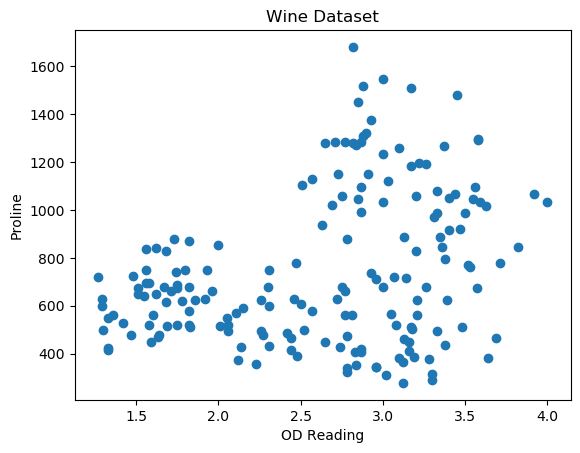

In [3]:
plt.scatter(wine_df["OD_read"], wine_df["Proline"])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

From the above scatter plot, the data points are dispersion. Most data points are distributed at the bottom or on the right-hand side of the graph. It looks like can be divided into three groups (or more): OD Reading below 2.0 and Proline below 1000, OD Reading higher than 2.0 and Proline lower than 900, and OD Reading higher than 2.5 and Proline lower higher than 900. 

4. List the main steps of the k-means and hierarchical clustering algorithms. What is similar between them? What is different?

|  | K-means | Hierarchical Clustering |
| :- | :- | :- |
| Main steps | <ol><li>pick k (number of clusters)</li><li>place k centroids randomly among the training data</li><li>calculate distance from each centroid to all the points in the training data</li><li>group all the data points with their nearest centroid</li><li>calculate the mean data point in a single cluster and move the previous<br> centroid to the mean location</li><li>repeat for each cluster</li><li>repeat the step 2 to step 6 until centroids don't move and colors don't<br> change or maximum number of iterations has been achieved</li></ol>  | <ol><li>given n data points, treat each point as an individual cluster</li><li>calculate distance between the centroids of all the clusters in the data</li><li>group the closest clusters or points</li><li>repeat step 2 and step 3 until there is only one single cluster</li><li>plot a dendrogram(tree plots)</li>
    | Similarity| <ul><li>both require iterations to achieve a desired outcome</li><li>both allow to specifiy the number of clusters to find</li></ul> |
| Difference| <ul><li>can pick k (number of clusters)</li><li>Simple and easy to explain</li><li>can take many iterations if initial centroids are far from final locations</li><li>struggles with overlapping clusters</li></ul>| <ul><li>no need to decide the number of clusters before</li><li>choose depth on dendogram to select clusters</li><li>two main options (agglonerative & divisive) </li><li>more hyperparameters to tweak</li></ul> |

5. Use the sklearn implementation of k-means on the wine dataset, knowing that there are three wine types.

In [4]:
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)

6. Use the sklearn implementation of hierarchical clustering on the wine dataset.

In [5]:
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)

7. Plot the predicted clusters from k-means.

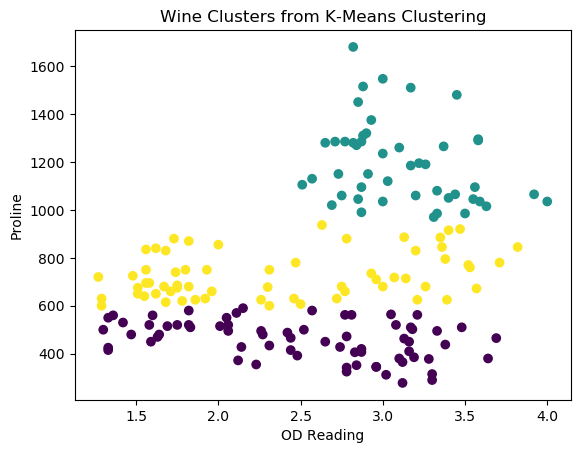

In [6]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=km_clusters)
plt.title("Wine Clusters from K-Means Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

8. Plot the predicted clusters from hierarchical clustering.

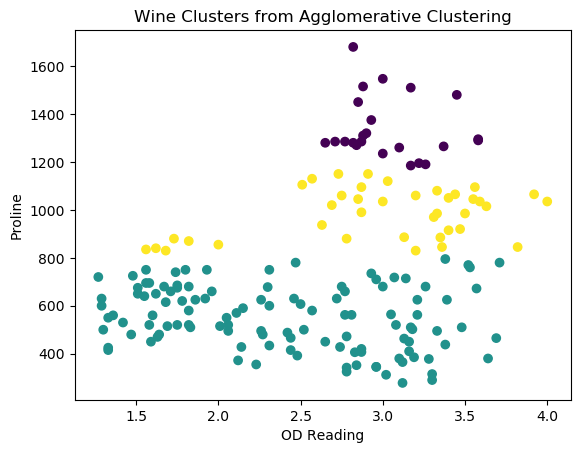

In [7]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=ac_clusters)
plt.title("Wine Clusters from Agglomerative Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

9. Compare the silhouette score of each clustering method. Considering the scores and plots, comment on whether one model is better than the other, or whether they performed similarly.

In [8]:
# Calculate Silhouette Scores
print("Silhouette Scores for Wine Dataset:\n")
print("K-Means Clustering: ", silhouette_score(wine_df, km_clusters))
print("Agglomerative Clustering: ", silhouette_score(wine_df, ac_clusters))

Silhouette Scores for Wine Dataset:

K-Means Clustering:  0.5809421087616886
Agglomerative Clustering:  0.5988495817462


From the plots above, each colour represents a single cluster. The k-means clustering divides the data points into three clusters: proline higher than 1000, proline between 600 to 1000, and proline lower than 600. However, agglomerative clustering has a different classification where it divides the data points into three clusters: proline higher than 1200, proline between 800 to 1200, and proline lower than 800. The silhouette score is a metric that indicates how well the points fit in their cluster. A score that is closer to +1 indicates a better performance. The agglomerative clustering with average linkage (separate clusters by mean intra-cluster distance) has a silhouette score of 0.5988 which is a little bit better than the k-means clustering (0.5809). Therefore, the agglomerative clustering model has a better performance when compared with the k-means clustering model. 